In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('uaScoresDataFrame.csv')
df

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,Canada,North America,7.5525,5.882,3.7965,0.000,1.4755,5.10450,8.966000,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,6.6590,4.2430
262,262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,5.704333,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
263,263,Yerevan,Armenia,Asia,9.6945,9.431,3.9265,0.000,1.7870,5.64925,6.501000,8.8730,5.102000,0.0000,4.43950,3.4580,8.0550,3.9000,4.7370,7.3465,7.7765
264,264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,5.720333,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


In [4]:
#check for any incompletes or duplicates
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [5]:
# one hot encoding: categorizing the country and continent into numerical values
# ADD CITY NAME IF YOU WAnt, IDK IF YOU WANT TO USE IT
# You can also drop if not using.
df2 = pd.get_dummies(data=df, columns=['UA_Country','UA_Continent'])
df2.head()
#df2=df

,Unnamed: 0,UA_Name,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,UA_Country_ Alabama,UA_Country_ Alaska,UA_Country_ Argentina,UA_Country_ Arizona,UA_Country_ Armenia,UA_Country_ Australia,UA_Country_ Austria,UA_Country_ Azerbaijan,UA_Country_ Belarus,UA_Country_ Belgium,UA_Country_ Belize,UA_Country_ Bolivia,UA_Country_ Bosnia and Herzegovina,UA_Country_ Brazil,UA_Country_ Bulgaria,UA_Country_ California,UA_Country_ Cambodia,UA_Country_ Canada,UA_Country_ Chile,UA_Country_ China,UA_Country_ Colombia,...,UA_Country_ Qatar,UA_Country_ Rhode Island,UA_Country_ Romania,UA_Country_ Russia,UA_Country_ Saudi Arabia,UA_Country_ Serbia,UA_Country_ Singapore,UA_Country_ Slovakia,UA_Country_ Slovenia,UA_Country_ South Africa,UA_Country_ South Carolina,UA_Country_ South Korea,UA_Country_ Spain,UA_Country_ Sweden,UA_Country_ Switzerland,UA_Country_ Taiwan,UA_Country_ Tanzania,UA_Country_ Tennessee,UA_Country_ Texas,UA_Country_ Thailand,UA_Country_ Tunisia,UA_Country_ Turkey,UA_Country_ Ukraine,UA_Country_ United Arab Emirates,UA_Country_ United Kingdom,UA_Country_ Uruguay,UA_Country_ Utah,UA_Country_ Uzbekistan,UA_Country_ Venezuela,UA_Country_ Vietnam,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Country_Andorra,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
0,0,Aarhus,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,Adelaide,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,Albuquerque,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,Almaty,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Amsterdam,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [6]:
df.dtypes

Unnamed: 0                 int64
UA_Name                   object
UA_Country                object
UA_Continent              object
Housing                  float64
Cost of Living           float64
Startups                 float64
Venture Capital          float64
Travel Connectivity      float64
Commute                  float64
Business Freedom         float64
Safety                   float64
Healthcare               float64
Education                float64
Environmental Quality    float64
Economy                  float64
Taxation                 float64
Internet Access          float64
Leisure & Culture        float64
Tolerance                float64
Outdoors                 float64
dtype: object

In [7]:
cols_to_scale = ['Housing', 'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity','Commute', 'Business Freedom', 'Safety','Healthcare','Education','Environmental Quality','Economy','Taxation','Internet Access','Leisure & Culture', 'Tolerance','Outdoors']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2                 

,Unnamed: 0,UA_Name,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,UA_Country_ Alabama,UA_Country_ Alaska,UA_Country_ Argentina,UA_Country_ Arizona,UA_Country_ Armenia,UA_Country_ Australia,UA_Country_ Austria,UA_Country_ Azerbaijan,UA_Country_ Belarus,UA_Country_ Belgium,UA_Country_ Belize,UA_Country_ Bolivia,UA_Country_ Bosnia and Herzegovina,UA_Country_ Brazil,UA_Country_ Bulgaria,UA_Country_ California,UA_Country_ Cambodia,UA_Country_ Canada,UA_Country_ Chile,UA_Country_ China,UA_Country_ Colombia,...,UA_Country_ Qatar,UA_Country_ Rhode Island,UA_Country_ Romania,UA_Country_ Russia,UA_Country_ Saudi Arabia,UA_Country_ Serbia,UA_Country_ Singapore,UA_Country_ Slovakia,UA_Country_ Slovenia,UA_Country_ South Africa,UA_Country_ South Carolina,UA_Country_ South Korea,UA_Country_ Spain,UA_Country_ Sweden,UA_Country_ Switzerland,UA_Country_ Taiwan,UA_Country_ Tanzania,UA_Country_ Tennessee,UA_Country_ Texas,UA_Country_ Thailand,UA_Country_ Tunisia,UA_Country_ Turkey,UA_Country_ Ukraine,UA_Country_ United Arab Emirates,UA_Country_ United Kingdom,UA_Country_ Uruguay,UA_Country_ Utah,UA_Country_ Uzbekistan,UA_Country_ Venezuela,UA_Country_ Vietnam,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Country_Andorra,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
0,0,Aarhus,0.61315,0.4015,0.28270,0.2512,0.319579,0.938062,0.994000,0.955698,0.933875,0.552621,0.740848,0.520394,0.480842,0.845916,0.31870,1.000000,0.488363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,Adelaide,0.63095,0.4692,0.31365,0.2640,0.134368,0.793082,0.939967,0.760411,0.851513,0.529503,0.818781,0.646379,0.430368,0.383318,0.43285,0.769997,0.676846,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,Albuquerque,0.72620,0.6059,0.37720,0.1493,0.100579,0.751393,0.867100,0.000000,0.689865,0.427556,0.705833,0.693770,0.404842,0.504360,0.48900,0.674767,0.405691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,Almaty,0.92820,0.9333,0.24585,0.0000,0.430737,0.872594,0.556800,0.689135,0.487698,0.235094,0.319074,0.561129,0.844421,0.216384,0.29370,0.616082,0.672676,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Amsterdam,0.30530,0.3824,0.79715,0.6107,0.823632,0.909341,0.883667,0.827124,0.848366,0.636392,0.736855,0.538126,0.468947,0.404199,0.88740,0.835524,0.646711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,0.75525,0.5882,0.37965,0.0000,0.102684,0.758639,0.896600,0.539710,0.832094,0.550304,0.522129,0.621991,0.713105,0.447740,0.46880,0.630423,0.503565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
262,262,Wroclaw,0.84520,0.8434,0.35860,0.2386,0.183632,0.736383,0.570433,0.788078,0.727559,0.428535,0.442828,0.507082,0.483895,0.546294,0.47495,0.299850,0.482309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
263,263,Yerevan,0.96945,0.9431,0.39265,0.0000,0.135474,0.839600,0.650100,0.869809,0.547386,0.000000,0.384162,0.368264,0.795263

We plot the correlation matrix for the different columns, we can get an idea of which columns are correlated from this figure

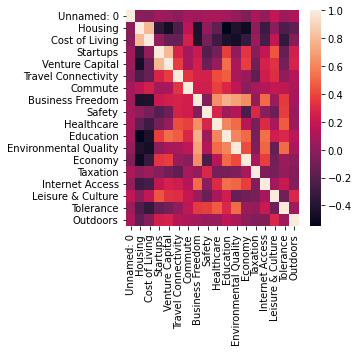

In [8]:
df3 = df2[df2.columns[:19]]

fig, ax = plt.subplots(figsize=(5,5))  

hm = sns.heatmap(df3.corr());
fig = hm.get_figure()
ax.figure.tight_layout()
fig.savefig('heatmap.jpg')

We then remove duplicate values and columns that are correlated with themselves and save it in a file

In [9]:
c = df3.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")
filtered_list = so[so>=0][::-2]
non_ones = filtered_list[filtered_list!=1.000]
non_ones.to_csv("correlation_list_reverse.csv")

df4=df3.drop(columns=["UA_Name"])


We create 4 categories using the correlations we have derived

In [10]:
import pandas as pd
import scipy.cluster.hierarchy as spc


df5 = df4.drop(columns=["Unnamed: 0"])
corr = df5.corr().values
print(df5.columns)
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
dict = {}
for i in range(len(idx)):
    if dict.get(idx[i]):
        dict[idx[i]].append(df5.columns[i])
    else:
        dict[idx[i]]= [df5.columns[i]]
dict

Index(['Housing', 'Cost of Living', 'Startups', 'Venture Capital',
       'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety',
       'Healthcare', 'Education', 'Environmental Quality', 'Economy',
       'Taxation', 'Internet Access', 'Leisure & Culture', 'Tolerance',
       'Outdoors'],
      dtype='object')


{1: ['Housing', 'Cost of Living'],
 2: ['Safety', 'Taxation'],
 3: ['Business Freedom',
  'Healthcare',
  'Education',
  'Environmental Quality',
  'Economy',
  'Internet Access',
  'Tolerance'],
 4: ['Startups',
  'Venture Capital',
  'Travel Connectivity',
  'Commute',
  'Leisure & Culture',
  'Outdoors']}

We create a representatuve value for each category from its columns

In [11]:
df4['category1']= df4['Housing']*df4['Cost of Living']
df4['category2']= df4['Travel Connectivity']*df4['Commute']*df4['Startups']*df4['Venture Capital']*df4['Leisure & Culture']*df4['Outdoors']
df4['category3']= df4['Business Freedom']*df4['Healthcare']*df4['Education']*df4['Environmental Quality']*df4['Economy']*df4['Internet Access']*df4['Tolerance']
df4['category4']= df4['Safety']*df4['Taxation']

In [12]:
df4['Vacation Lovers']= df4['Startups']*df4['Venture Capital']*df4['Business Freedom']*df4['Taxation']*df4['Economy']
df4['Entrepreneur & Business person']= df4['Travel Connectivity']*df4['Commute']*df4['Leisure & Culture']*df4['Internet Access']
df4['Stability Seeker']= df4['Housing']*df4['Cost of Living']*df4['Tolerance']*df4['Outdoors']
df4['Family']= df4['Safety']*df4['Healthcare']*df4['Education']*df4['Environmental Quality']

We then normalized this combined categorical data

In [13]:
df6 = df4[['category1','category2','category3','category4']]
df7 = df4[['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']]
cols_to_scale =['category1','category2','category3','category4']
scaler = MinMaxScaler()
df6[cols_to_scale] = scaler.fit_transform(df6[cols_to_scale])
scaler = MinMaxScaler()
cols_to_scale =['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']
df7[cols_to_scale] = scaler.fit_transform(df7[cols_to_scale])


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [14]:
df7

,Vacation Lovers,Entrepreneur & Business person,Stability Seeker,Family
0,0.028931,0.103923,0.182111,0.656049
1,0.035464,0.022736,0.233708,0.504018
2,0.022465,0.023967,0.182452,0.000000
3,0.000000,0.030715,0.543812,0.045265
4,0.177814,0.345436,0.095555,0.590787
...,...,...,...,...
261,0.000000,0.021025,0.213622,0.231677
262,0.019616,0.045115,0.156158,0.195357
263,0.000000,0.023052,0.966565,0.000000
264,0.013914,0.034315,0.442353,0.276525


In [15]:
df6

,category1,category2,category3,category4
0,0.246180,0.007213,0.761387,0.463056
1,0.296042,0.005627,0.301294,0.329761
2,0.440005,0.001838,0.193978,0.000000
3,0.866289,0.000000,0.006935,0.586373
4,0.116747,0.455483,0.290757,0.390846
...,...,...,...,...
261,0.444238,0.000000,0.171281,0.387815
262,0.712842,0.005769,0.029773,0.384265
263,0.914288,0.000000,0.000000,0.697020
264,0.640985,0.005752,0.041108,0.671559


=======Assigninng weight part=======

as we can see from df6 and df7 above,, the value for each category is unbalanced, we have to set a new weight to each column

In [16]:
# process data: normalize each column, keep the 'UA_Continent' column
data_con=df.drop(columns=['Unnamed: 0'])
column_list=list(df.columns)
cols_to_scale = column_list[4:]
scaler = MinMaxScaler()
data_con[cols_to_scale] = scaler.fit_transform(data_con[cols_to_scale])

#we use data_con in this part
data_con

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Aarhus,Denmark,Europe,0.61315,0.4015,0.28270,0.2512,0.319579,0.938062,0.994000,0.955698,0.933875,0.552621,0.740848,0.520394,0.480842,0.845916,0.31870,1.000000,0.488363
1,Adelaide,Australia,Oceania,0.63095,0.4692,0.31365,0.2640,0.134368,0.793082,0.939967,0.760411,0.851513,0.529503,0.818781,0.646379,0.430368,0.383318,0.43285,0.769997,0.676846
2,Albuquerque,New Mexico,North America,0.72620,0.6059,0.37720,0.1493,0.100579,0.751393,0.867100,0.000000,0.689865,0.427556,0.705833,0.693770,0.404842,0.504360,0.48900,0.674767,0.405691
3,Almaty,Kazakhstan,Asia,0.92820,0.9333,0.24585,0.0000,0.430737,0.872594,0.556800,0.689135,0.487698,0.235094,0.319074,0.561129,0.844421,0.216384,0.29370,0.616082,0.672676
4,Amsterdam,Netherlands,Europe,0.30530,0.3824,0.79715,0.6107,0.823632,0.909341,0.883667,0.827124,0.848366,0.636392,0.736855,0.538126,0.468947,0.404199,0.88740,0.835524,0.646711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Winnipeg,Canada,North America,0.75525,0.5882,0.37965,0.0000,0.102684,0.758639,0.896600,0.539710,0.832094,0.550304,0.522129,0.621991,0.713105,0.447740,0.46880,0.630423,0.503565
262,Wroclaw,Poland,Europe,0.84520,0.8434,0.35860,0.2386,0.183632,0.736383,0.570433,0.788078,0.727559,0.428535,0.442828,0.507082,0.483895,0.546294,0.47495,0.299850,0.482309
263,Yerevan,Armenia,Asia,0.96945,0.9431,0.39265,0.0000,0.135474,0.839600,0.650100,0.869809,0.547386,0.000000,0.384162,0.368264,0.795263,0.332721,0.47370,0.712931,0.978945
264,Zagreb,Croatia,Europe,0.89100,0.7194,0.44530,0.1775,0.160842,0.717842,0.572033,0.844914,0.779558,0.330656,0.707173,0.238179,0.788789,0.462770,0.49945,0.785899,0.579712


In [17]:
# define parameters

#category_list from correlation heatmap
category_list=[['Housing', 'Cost of Living'],
               ['Travel Connectivity','Commute','Startups','Venture Capital','Leisure & Culture','Outdoors'],
               ['Business Freedom','Healthcare','Education','Environmental Quality','Economy','Internet Access','Tolerance'],
               ['Safety', 'Taxation']]

#manual_list from manually selected categories
manual_list=[['Startups','Venture Capital','Business Freedom','Taxation','Economy'],
            ['Travel Connectivity','Commute','Leisure & Culture','Internet Access'],
            ['Housing','Cost of Living','Tolerance','Outdoors'],
            ['Safety','Healthcare','Education','Environmental Quality']]


color_list=['black','red','yellow','green','blue','purple','orange']

plots for category1-4 on continents

check the invariance of data based on continent

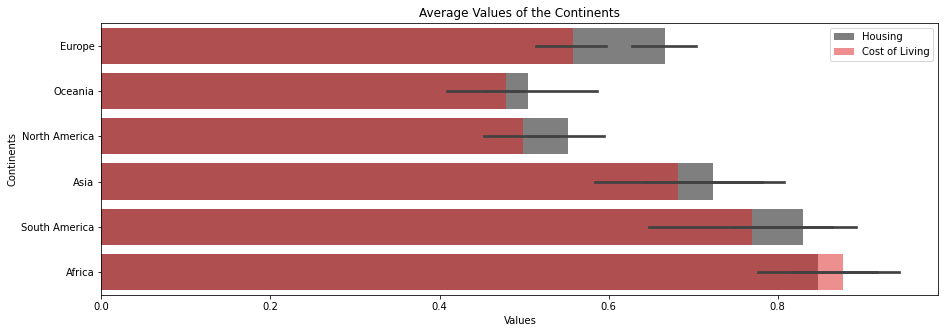

In [18]:
#plot bar on continents for category1
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[0])):
    sns.barplot(y='UA_Continent',x=category_list[0][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[0][i])


plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

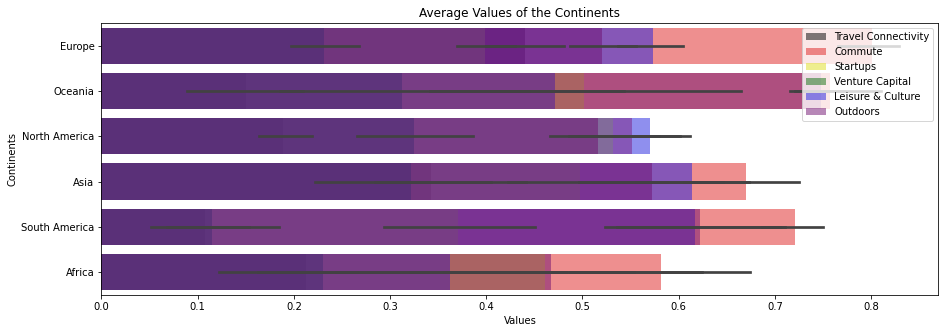

In [19]:
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[1])):
    sns.barplot(y='UA_Continent',x=category_list[1][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[1][i])

plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

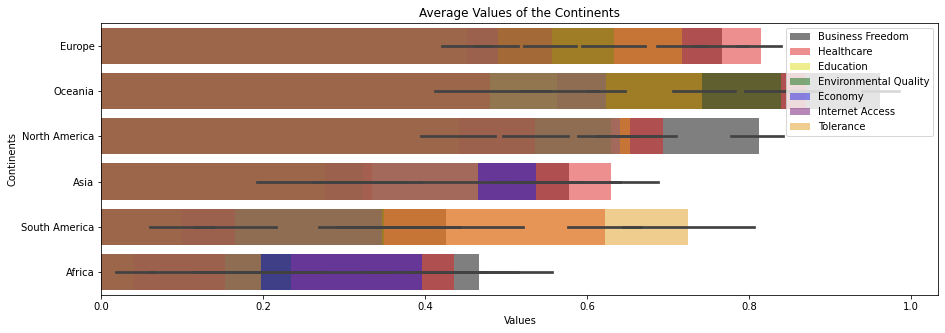

In [20]:
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[2])):
    sns.barplot(y='UA_Continent',x=category_list[2][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[2][i])

plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

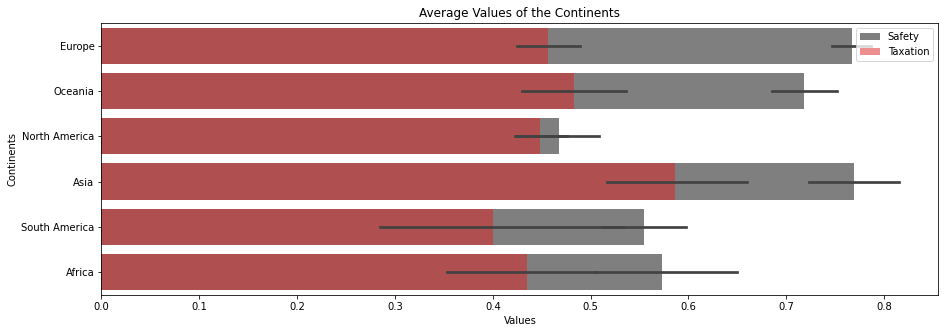

In [21]:
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[3])):
    sns.barplot(y='UA_Continent',x=category_list[3][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[3][i])

plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

In [22]:
# check the mean value of each column 
df_temp=data_con[cols_to_scale]*10
df_mean=df_temp.mean()
df_var=df_temp.var()
print('mean\n',df_mean,'\n')
print('var\n',df_var)
df_temp
### var does not vary much, we just have to ajust the mean value to the same level.
### annother approach would be ajust the mean value according to each continent(haven't tried out yet)

mean
 Housing                  6.467271
Cost of Living           5.745940
Startups                 4.595295
Venture Capital          2.702515
Travel Connectivity      3.102070
Commute                  6.883807
Business Freedom         7.330762
Safety                   6.501629
Healthcare               7.291946
Education                3.949360
Environmental Quality    5.671994
Economy                  5.386732
Taxation                 4.687574
Internet Access          4.824476
Leisure & Culture        5.710068
Tolerance                6.464737
Outdoors                 5.371775
dtype: float64 

var
 Housing                  5.264649
Cost of Living           5.988317
Startups                 4.634723
Venture Capital          6.520081
Travel Connectivity      4.847544
Commute                  5.123894
Business Freedom         4.449684
Safety                   4.071156
Healthcare               2.527794
Education                5.193259
Environmental Quality    6.037395
Economy             

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,6.1315,4.015,2.8270,2.512,3.195789,9.380620,9.940000,9.556980,9.338745,5.526207,7.408483,5.203940,4.808421,8.459156,3.1870,10.000000,4.883627
1,6.3095,4.692,3.1365,2.640,1.343684,7.930817,9.399667,7.604113,8.515128,5.295026,8.187809,6.463791,4.303684,3.833180,4.3285,7.699970,6.768465
2,7.2620,6.059,3.7720,1.493,1.005789,7.513933,8.671000,0.000000,6.898648,4.275564,7.058331,6.937700,4.048421,5.043598,4.8900,6.747675,4.056908
3,9.2820,9.333,2.4585,0.000,4.307368,8.725942,5.568000,6.891353,4.876976,2.350942,3.190741,5.611289,8.444211,2.163837,2.9370,6.160816,6.726759
4,3.0530,3.824,7.9715,6.107,8.236316,9.093409,8.836667,8.271241,8.483656,6.363917,7.368553,5.381257,4.689474,4.041992,8.8740,8.355236,6.467106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,7.5525,5.882,3.7965,0.000,1.026842,7.586386,8.966000,5.397100,8.320936,5.503038,5.221288,6.219915,7.131053,4.477398,4.6880,6.304230,5.035652
262,8.4520,8.434,3.5860,2.386,1.836316,7.363826,5.704333,7.880783,7.275588,4.285347,4.428280,5.070820,4.838947,5.462942,4.7495,2.998500,4.823086
263,9.6945,9.431,3.9265,0.000,1.354737,8.396002,6.501000,8.698088,5.473857,0.000000,3.841622,3.682641,7.952632,3.327214,4.7370,7.129313,9.789452
264,8.9100,7.194,4.4530,1.775,1.608421,7.178420,5.720333,8.449142,7.795580,3.306560,7.071734,2.381789,7.887895,4.627696,4.9945,7.858986,5.797121


Assign weight to 2 parallel cases: 

### method
- get mean for each column
- adjust the mean value of each column to around 5, keep the variance unmodified 
- the value for each category = avg(each column in this category)

In [23]:
for item in cols_to_scale:
    df_temp[item]=df_temp[item]-df_mean.loc[item]+5

df_temp

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,4.664229,3.26906,3.231705,4.809485,5.093720,7.496812,7.609238,8.055351,7.046799,6.576847,6.736489,4.817209,5.120847,8.634680,2.476932,8.535263,4.511852
1,4.842229,3.94606,3.541205,4.937485,3.241615,6.047009,7.068905,6.102483,6.223181,6.345666,7.515815,6.077060,4.616110,4.008704,3.618432,6.235233,6.396690
2,5.794729,5.31306,4.176705,3.790485,2.903720,5.630126,6.340238,-1.501629,4.606702,5.326204,6.386337,6.550968,4.360847,5.219122,4.179932,5.282937,3.685134
3,7.814729,8.58706,2.863205,2.297485,6.205299,6.842135,3.237238,5.389724,2.585029,3.401582,2.518747,5.224557,8.756636,2.339361,2.226932,4.696079,6.354984
4,1.585729,3.07806,8.376205,8.404485,10.134246,7.209601,6.505905,6.769612,6.191710,7.414557,6.696559,4.994525,5.001899,4.217516,8.163932,6.890498,6.095331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,6.085229,5.13606,4.201205,2.297485,2.924772,5.702579,6.635238,3.895471,6.028989,6.553678,4.549294,5.833183,7.443478,4.652922,3.977932,4.839493,4.663877
262,6.984729,7.68806,3.990705,4.683485,3.734246,5.480018,3.373571,6.379154,4.983642,5.335986,3.756286,4.684088,5.151373,5.638466,4.039432,1.533762,4.451311
263,8.227229,8.68506,4.331205,2.297485,3.252667,6.512195,4.170238,7.196459,3.181911,1.050640,3.169628,3.295910,8.265057,3.502738,4.026932,5.664575,9.417678
264,7.442729,6.44806,4.857705,4.072485,3.506351,5.294613,3.389571,6.947513,5.503633,4.357199,6.399740,1.995058,8.200321,4.803220,4.284432,6.394248,5.425346


In [24]:
df4['category1']= (df4['Housing']+df4['Cost of Living'])/2
df4['category2']= (df4['Travel Connectivity']+df4['Commute']+df4['Startups']+df4['Venture Capital']+df4['Leisure & Culture']+df4['Outdoors'])/6
df4['category3']= (df4['Business Freedom']+df4['Healthcare']+df4['Education']+df4['Environmental Quality']+df4['Economy']+df4['Internet Access']+df4['Tolerance'])/7
df4['category4']= (df4['Safety']+df4['Taxation'])/2

In [25]:
df4['Vacation Lovers']= (df4['Startups']+df4['Venture Capital']+df4['Business Freedom']+df4['Taxation']+df4['Economy'])/5
df4['Entrepreneur & Business person']= (df4['Travel Connectivity']+df4['Commute']+df4['Leisure & Culture']+df4['Internet Access'])/4
df4['Stability Seeker']= (df4['Housing']+df4['Cost of Living']+df4['Tolerance']+df4['Outdoors'])/4
df4['Family']= (df4['Safety']+df4['Healthcare']+df4['Education']+df4['Environmental Quality'])/4

In [26]:
df8 = df4[['category1','category2','category3','category4']]
df9 = df4[['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']]
cols_to_scale =['category1','category2','category3','category4']
scaler = MinMaxScaler()
df8[cols_to_scale] = scaler.fit_transform(df8[cols_to_scale])
df8=df8*10
scaler = MinMaxScaler()
cols_to_scale =['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']
df9[cols_to_scale] = scaler.fit_transform(df9[cols_to_scale])
df9=df9*10


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [27]:
df8=df8.round(2)
df8

,category1,category2,category3,category4
0,5.07,4.54,9.78,6.50
1,5.50,4.57,8.28,4.95
2,6.66,3.88,7.42,0.00
3,9.31,4.37,3.80,7.11
4,3.44,8.70,8.15,5.61
...,...,...,...,...
261,6.72,3.76,7.27,5.34
262,8.44,4.29,5.02,5.46
263,9.56,4.98,3.80,7.94
264,8.05,4.50,5.83,7.74


In [28]:
df9=df9.round(2)
df9

,Vacation Lovers,Entrepreneur & Business person,Stability Seeker,Family
0,4.99,6.20,5.69,8.89
1,5.16,4.29,5.86,8.01
2,4.90,4.58,5.33,3.49
3,4.20,4.49,8.21,3.12
4,6.91,7.89,4.39,8.36
...,...,...,...,...
261,5.20,4.39,5.59,5.95
262,4.07,4.85,5.56,5.73
263,4.19,4.40,9.99,3.40
264,4.23,4.57,7.53,6.82


-------Getting Weights (importance) of each category for classifying given city into four categories ------

In [35]:
#first we cluster given data into four clusters using k means clustering
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [69]:
df.head()

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [71]:
df10 = df.drop(columns=['UA_Name','Unnamed: 0'])
df10.head()

,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [72]:
from sklearn.preprocessing import LabelEncoder, normalize

In [74]:
le = LabelEncoder()
df10['UA_Country'] = le.fit_transform(df10['UA_Country'])
df10['UA_Continent'] = le.fit_transform(df10['UA_Continent'])

In [75]:
df10['UA_Country'] = (df10['UA_Country']).astype('category')
df10['UA_Continent'] = (df10['UA_Continent']).astype('category')

In [76]:
df11 = normalize(df10)

In [77]:
kmeans.fit(df11)

KMeans(init='random', n_clusters=4, random_state=42)

In [78]:
#get labels of cities based on above clusters
y = kmeans.labels_
X = df11

In [79]:
import xgboost as xgb

In [80]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [82]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 100)

In [83]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [84]:
accuracy_score(preds,y_test)

0.9629629629629629

----how decision is made with what threshold on classifying given city into one of four categories---

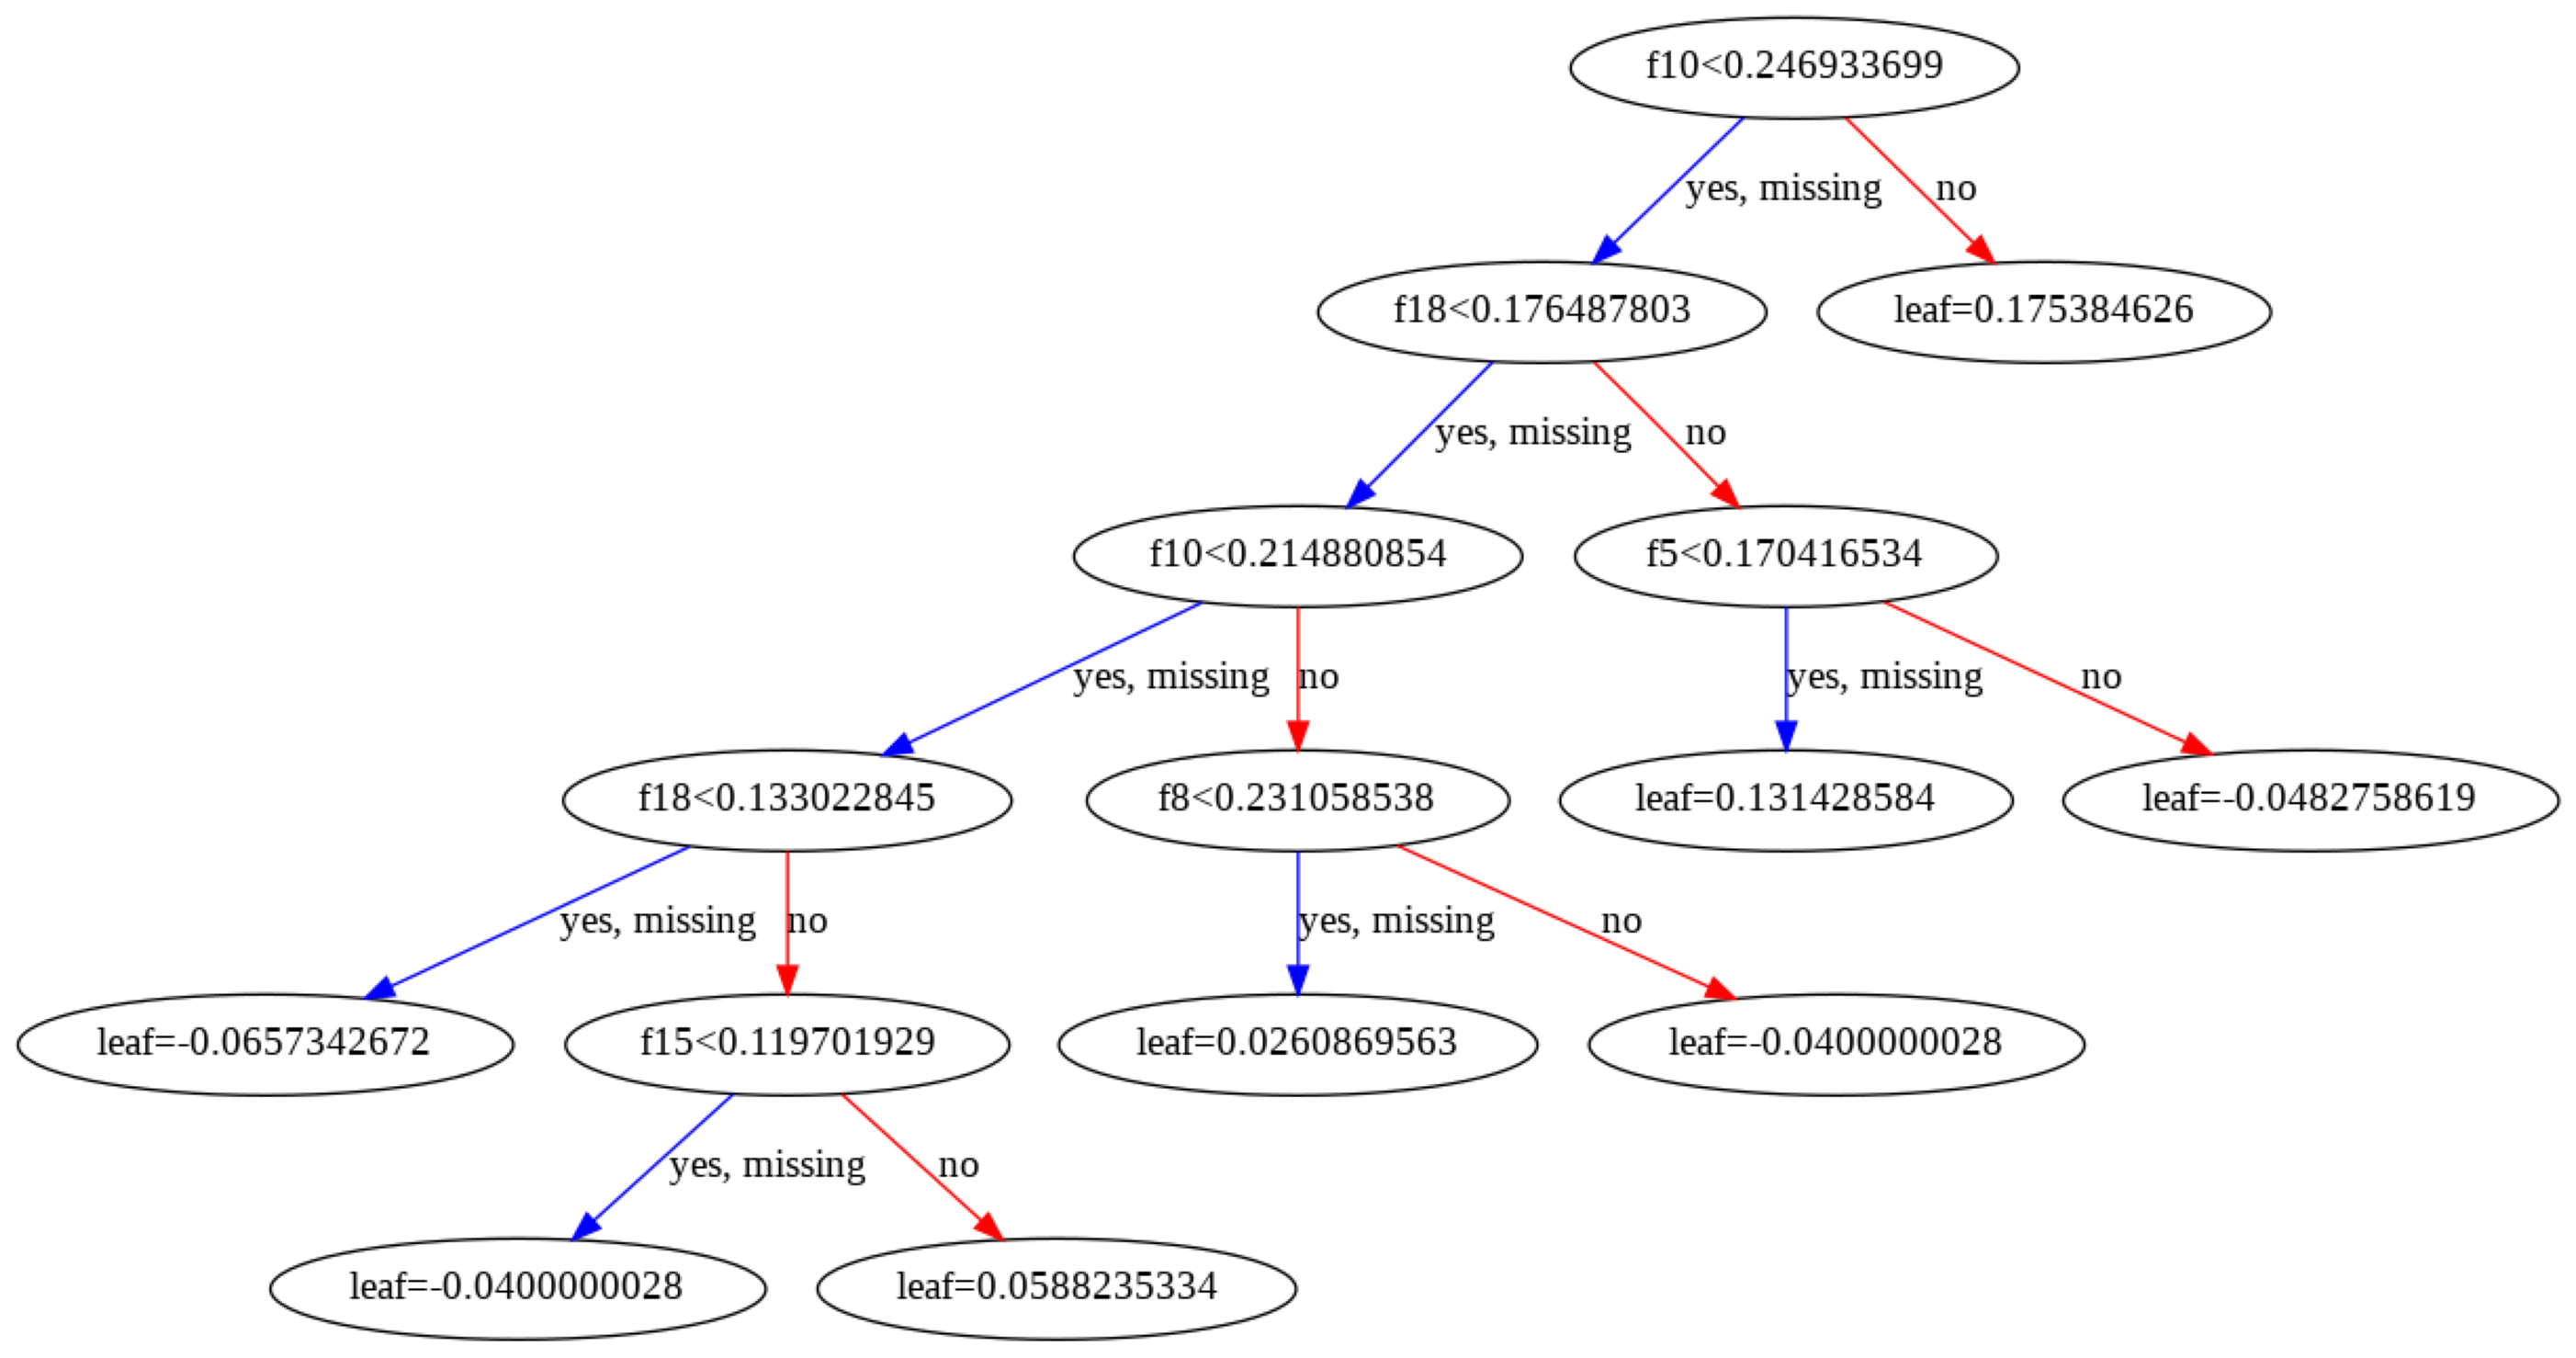

In [104]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

--- importance of each feature in classifying each city into one of four categories---

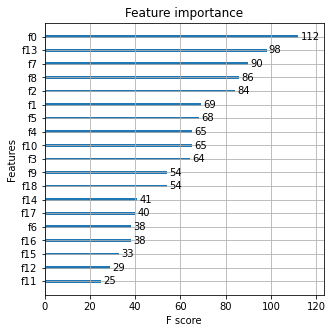

In [95]:
xgb.plot_importance(xg_reg)
plt.show()

In [102]:
xg_reg.feature_importances_

array([0.19609712, 0.03313348, 0.04512846, 0.02621973, 0.03851077,
       0.03006627, 0.01049607, 0.09537717, 0.10415477, 0.06237888,
       0.05320204, 0.01542288, 0.01371356, 0.06679067, 0.02666449,
       0.01276171, 0.02906124, 0.12115785, 0.01966283], dtype=float32)